# Predict survival on the Titanic using Random Forest

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import random

### Data preprocessing

In [2]:
df = pd.read_csv('dataset/titanic_passengers.csv')

In [3]:
df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

### Statistical measures

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check for missing values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling missing values

1. Drop "Cabin" column

In [7]:
df = df.drop(columns=['Cabin'], axis=1)

2. Replace missing values in "Age" column with mean value

In [8]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

3. Check for the most repeated value in "Embarked" column using mode

In [9]:
df["Embarked"].mode()[0]   # mode at index 0. 'S' is returned

'S'

4. Replace missing values in "Embarked" column using mode

In [10]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

#### Confirm missing values

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Find the number of people who survived and who didn't survive

In [12]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Out of 891 passengers, **549** passengers did not survive and **342** passengers survived the titanic incident.

### Data visualization

In [13]:
sns.set()

1. How many passengers survived the incident.

<Axes: xlabel='Survived', ylabel='count'>

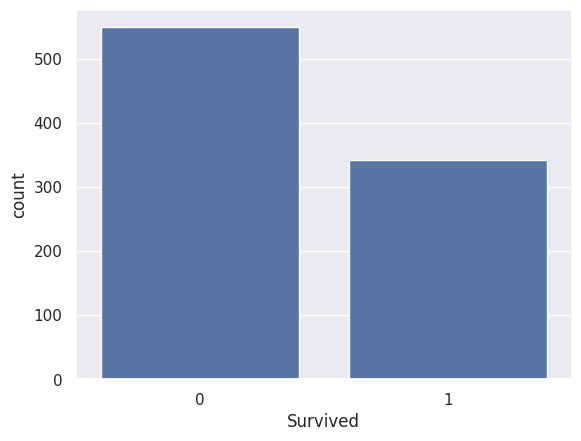

In [15]:
sns.countplot(x='Survived', data=df)

2. How many females and males survived?

In [18]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

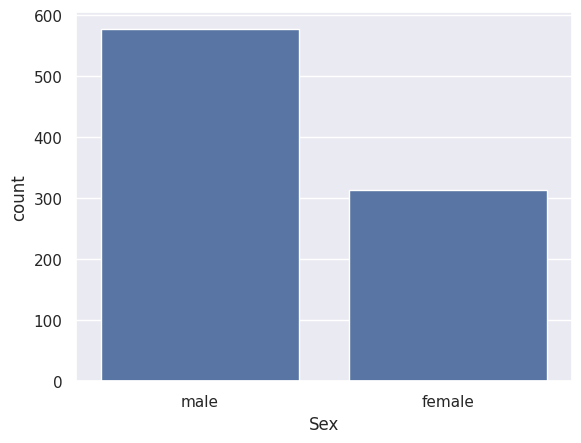

In [17]:
sns.countplot(data=df, x='Sex')

3. How many passengers survived or did not survive the titanic incident?

<Axes: xlabel='Sex', ylabel='count'>

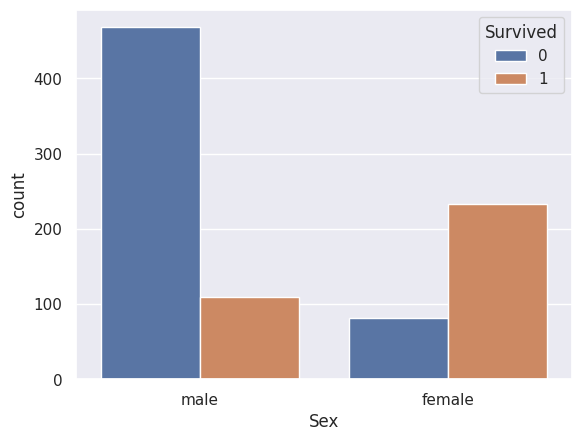

In [19]:
sns.countplot(data=df, x='Sex', hue='Survived')

**NOTE**
- 1 rep. those who survived while 0 rep. those who didn't survive.

From the countplot shown above:
- Out of 577 male passengers, only 100 survived.
- Out of 314 female passengers, more than 200 survived.

### Encoding

Encoding categorical columns: 
- Sex
- Embarked

In [24]:
df.replace({
    'Sex': {
        'male': 1,
        'female': 0,
    },
    'Embarked': {
        'S': 0,
        'C': 1,
        'Q': 2,
    }
},
  inplace=True  
)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


### Separate features and target

In [26]:
X = df.drop(columns=["PassengerId", "Name", "Survived", "Ticket"], axis=1)
y = df["Survived"]

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Split data into training data and testing data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=9)

In [24]:
(X.shape, X_train.shape, X_test.shape)

((891, 7), (882, 7), (9, 7))

### Training a LogisticRegression() model

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

#### Accuracy score

1. Accuracy score - training data

In [34]:
model.score(X_train, y_train)

0.8027210884353742

2. Accuracy score = testing data

In [35]:
model.score(X_test, y_test)

1.0

## Build a predictive system

In [ ]:
input_data = (
    
)

# convert data into a numpy array and reshape the array
data_array = np.asarray(input_data).reshape(1, -1)

# scale, i.e. standardize data array
scaled_data_array = scaler.transform(data_array)

# make prediction
prediction = model.predict(scaled_data_array)

# display diagnosis
print("Diagnosis: Parkinson's disease 🤒") if prediction[0] == 1 else print('Patient is healthy 🌲')